# Students performance in exams
#### Marks secured by the students in college

## Aim
#### To understand the influence of various factors like economic, personal and social on the students performance 

## Inferences would be : 
#### 1. How to imporve the students performance in each test ?
#### 2. What are the major factors influencing the test scores ?
#### 3. Effectiveness of test preparation course?
#### 4. Other inferences 

#### Import the required libraries

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/sse/opt/anaconda3/envs/py3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Let us initialize the required values ( we will use them later in the program )
#### we will set the minimum marks to 40 to pass in a exam

In [2]:
passmark = 40

#### Let us read the data from the csv file

In [3]:
df = pd.read_csv("../input/StudentsPerformance.csv")

# -- STEFANOS -- Replicate Data

In [4]:
df = df
intended_df_size_in_MB = 256
factor = intended_df_size_in_MB*(2**20)/df.memory_usage(index=True).sum()
if int(factor) > 0:
    df = pd.concat([df]*int(factor), ignore_index=True)
else:
    rowCount = int(df.shape[0]*factor)
    df = df[0:rowCount]
df = df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185000 entries, 0 to 4184999
Data columns (total 8 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   gender                       object
 1   race/ethnicity               object
 2   parental level of education  object
 3   lunch                        object
 4   test preparation course      object
 5   math score                   int64 
 6   reading score                int64 
 7   writing score                int64 
dtypes: int64(3), object(5)
memory usage: 255.4+ MB


#### We will print top few rows to understand about the various data columns

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Size of data frame

In [6]:
print (df.shape)

(1000000, 8)


#### Let us understand about the basic information of the data, like min, max, mean and standard deviation etc.

In [7]:
df.describe()

,math score,reading score,writing score
count,1000000.000000,1000000.000000,1000000.000000
mean,66.089000,69.169000,68.054000
std,15.155504,14.592897,15.188065
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


#### Let us check for any missing values

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### As seen above, there are no missing ( null ) values in this dataframe but in real scenarios we need work on dataset with a lot of missing values  

####  Let us explore the Math Score first

In [9]:
# STEFANOS: Disable plotting
# p = sns.countplot(x="math score", data = df, palette="muted")
# _ = plt.setp(p.get_xticklabels(), rotation=90) 

#### How many students passed in Math exam ?

In [10]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960000
F     40000
Name: Math_PassStatus, dtype: int64

In [11]:
# STEFANOS: Disable plotting
# p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
# _ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Let us explore the Reading score

In [12]:
# STEFANOS: Disable plotting
# sns.countplot(x="reading score", data = df, palette="muted")
# plt.show()

#### How many studends passed in reading ?

In [13]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974000
F     26000
Name: Reading_PassStatus, dtype: int64

In [14]:
# STEFANOS: Disable plotting
# p = sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
# _ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Let us explore writing score

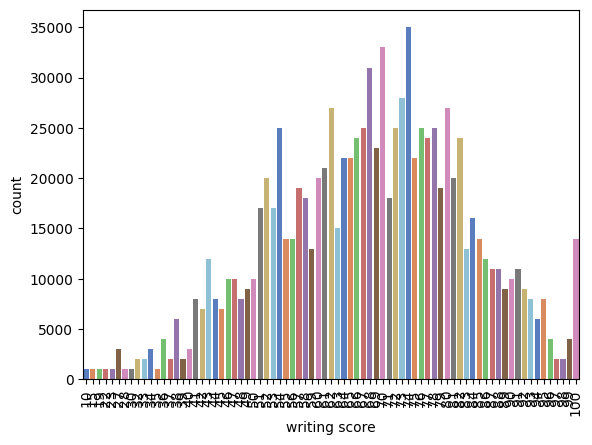

In [15]:
# STEFANOS: Disable plotting
# p = sns.countplot(x="writing score", data = df, palette="muted")
# _ = plt.setp(p.get_xticklabels(), rotation=90) 

#### How many students passed writing ?

In [16]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968000
F     32000
Name: Writing_PassStatus, dtype: int64

In [17]:
# STEFANOS: Disable plotting
# p = sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
# _ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Iet us check "How many students passed in all the subjects ?"

In [18]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P', axis =1)

df.OverAll_PassStatus.value_counts()

P    949000
F     51000
Name: OverAll_PassStatus, dtype: int64

In [19]:
# STEFANOS: Disable plotting
# p = sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
# _ = plt.setp(p.get_xticklabels(), rotation=90) 

#### Find the percentage of marks

In [20]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

In [21]:
# STEFANOS: Disable plotting
# p = sns.countplot(x="Percentage", data = df, palette="muted")
# _ = plt.setp(p.get_xticklabels(), rotation=0) 

#### Let us assign the grades

### Grading 
####    above 80 = A Grade
####      70 to 80 = B Grade
####      60 to 70 = C Grade
####      50 to 60 = D Grade
####      40 to 50 = E Grade
####    below 40 = F Grade  ( means Fail )


In [22]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261000
C    256000
A    198000
D    178000
E     56000
F     51000
Name: Grade, dtype: int64

#### we will plot the grades obtained in a order

In [23]:
# STEFANOS: Disable plotting
# sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
# plt.show()

In [24]:
# STEFANOS: Disable plotting
# p = sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
# _ = plt.setp(p.get_xticklabels(), rotation=90) 